In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [2]:
credito = pd.read_csv("../data/credit3.csv", sep=";")

credito.head()

# class 1 = good, class 2 = bad

,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,1
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,0
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,1
3,4,<0,existing paid,42,7882,2,4,45,1,2,1
4,5,<0,delayed previously,24,4870,3,4,53,2,2,0


In [3]:
# 1. Quantas instâncias e atributos existem, respectivamente?
credito.groupby(["class"])["class"].count()

# Classe está desbalanceada

class
0    300
1    700
Name: class, dtype: int64

In [4]:
previsores = credito.iloc[:, 1:10].values

classe = credito.iloc[:, 10].values

In [5]:
labelEncoder = LabelEncoder()

previsores[:, 0] = labelEncoder.fit_transform(previsores[:, 0])
previsores[:, 1] = labelEncoder.fit_transform(previsores[:, 1])

In [6]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    previsores, classe, test_size=0.3, random_state=123
)

In [7]:
svmModel = svm.SVC(decision_function_shape="ovo")

svmModel.fit(X_treinamento, y_treinamento)

SVC(decision_function_shape='ovo')

In [8]:
previsao = svmModel.predict(X_teste)

confusao = confusion_matrix(y_teste, previsao)

confusao

array([[ 12,  88],
       [  6, 194]])

In [9]:
taxa_acerto = accuracy_score(y_teste, previsao)

taxa_acerto

0.6866666666666666

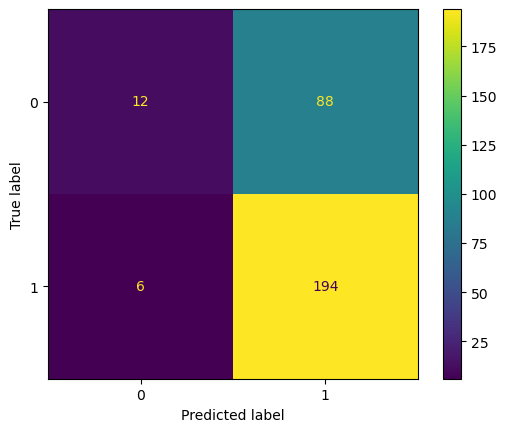

In [10]:
ConfusionMatrixDisplay(confusao).plot()

In [11]:
taxa_erro = 1 - taxa_acerto

taxa_erro

0.31333333333333335

In [12]:
recall = recall_score(y_teste, previsao)

recall

0.97

In [13]:
precision = precision_score(y_teste, previsao)

precision

0.6879432624113475

In [14]:
f1 = f1_score(y_teste, previsao)

f1

0.8049792531120332

In [15]:
auc = roc_auc_score(y_teste, previsao)

auc

0.545

In [16]:
log = log_loss(y_teste, previsao)

log

11.293678061923375

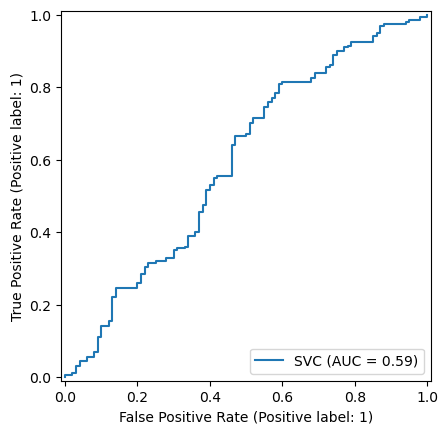

In [17]:
RocCurveDisplay.from_estimator(svmModel, X_teste, y_teste)